# Day 3: Geospatial web services and Interactive maps

### What is Geospatial Web Services? 

”A Web service that provides access to, or data processing on, geographic information. The OGC WebFeature Service (WFS), Web Map Service (WMS) are examples of geospatial Web service.” [IGI Global](https://www.igi-global.com/chapter/geospatial-interoperability/13798)

The Open Geospatial Consortium [OGC](https://www.ogc.org) is an international not for profit organization committed to making quality [open standards](https://www.ogc.org/docs/is) for the global geospatial community. 

Web Map Service (WMS)::: provides pre-assembled maps (may contain both vector and raster) to a requesting client. Map is usually generated upon request or cached.

Web Feature Service (WFS)::: allows clients to request raw vector data. May allow creating, editing, and deleting features on the server.


# Part 1: how to retrieve geographical data 

**We are going to retrieve geographical data from a popular platform called OpenStreetMap**

[OpenStreetMap](https://www.openstreetmap.org/) is a collaborative mapping project, which aims at creating a free editable map of the world. More about it [here](https://en.wikipedia.org/wiki/OpenStreetMap).

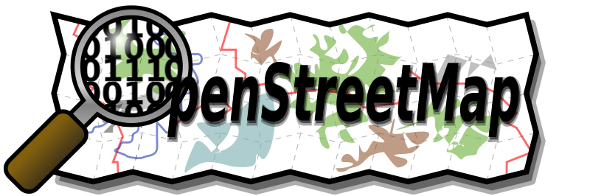

### Required modules for this session
- osmnx
- folium
- matplotlib

OSMnx module allows you to retrieve OpenStreetMap data using [OverPass API](https://wiki.openstreetmap.org/wiki/Overpass_API).

We will download and visualize OSM data covering a specified area of interest in Copenhagen.

OSMnx allows you to specify an address to retrieve the OpenStreetMap data around that area. Couldn’t be better!

In [4]:
# import neccesary modules
# osmnx is easy to use for downloading OpenStreetMap data
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_adr = "Christianshavn, Copenhagen, Denmark"

# Fetch OSM street network from the address
graph = ox.graph_from_address(place_adr, distance=1000)
type(graph)


networkx.classes.multidigraph.MultiDiGraph

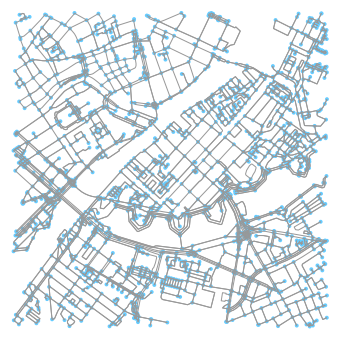

In [5]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

In [6]:
# Retrieve the footprint of the address
area = ox.gdf_from_place(place_adr)

# Retrieve buildings from the area
buildings = ox.footprints_from_address(place_adr, distance=1000)

ox.footprints_from_address(place_adr, distance=1000)


# What types are those?
print(type(area))
print(type(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


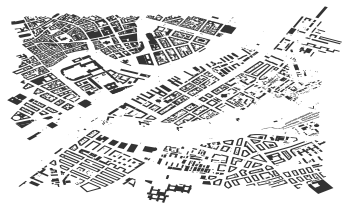

In [7]:
fig, ax = ox.plot_footprints(buildings)

Let’s also retrieve restaurants that are located on the area:

In [8]:
# Retrieve restaurants
restaurants = ox.pois_from_address(place_adr, amenities=['restaurant'], distance= 1000)

# How many restaurants do we have?
len(restaurants)


161

Let’s explore what kind of attributes we have in our restaurants GeoDataFrame

In [9]:
# Available columns
restaurants.columns

Index(['osmid', 'geometry', 'amenity', 'cuisine', 'fvst:navnelbnr', 'name',
       'opening_hours', 'phone', 'website', 'element_type', 'diet:vegan',
       'diet:vegetarian', 'fvst:name', 'wheelchair', 'opening_hours:kitchen',
       'operator', 'outdoor_seating', 'opening_hours:cafe', 'smoking',
       'takeaway', 'branch', 'survey:date', 'capacity', 'award:michelin',
       'contact:instagram', 'dinner', 'email', 'facebook',
       'payment:credit_cards', 'reservation', 'toilets', 'note', 'diaper',
       'diaper:unisex', 'fvst:fixme', 'happycow:id', 'internet_access',
       'internet_access:fee', 'organic', 'wikidata', 'wikipedia', 'end_date',
       'opening_hours:url', 'source', 'alt_name', 'phone:restaurant',
       'phone:takeaway', 'delivery', 'year', 'description', 'lunch',
       'toilets:wheelchair', 'addr:city', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'payment:bitcoin', 'stars', 'toilets:access',
       'addr:country', 'comment', 'start_date', 'building

In [10]:
buildings.columns

Index(['nodes', 'architect', 'building', 'building:levels', 'name', 'office',
       'geometry', 'fvst:navnelbnr', 'short_name', 'tourism',
       ...
       'ship:type', 'diaper', 'toilets:wheelchair', 'building:min_level',
       'members', 'type', 'architect:wikidata', 'name:uk', 'name:ca',
       'name:tr'],
      dtype='object', length=129)

In [11]:
# Select some useful cols and print
cols = ['alt_name', 'cuisine', 'opening_hours', 'outdoor_seating',
        'phone', 'wheelchair', 'geometry']
# Print only selected cols
restaurants[cols].head(12)

,alt_name,cuisine,opening_hours,outdoor_seating,phone,wheelchair,geometry
137534794,NaN,steak,"Mo-Sa 11:30-05:00,Su 17:00-05:00",NaN,+45 33117587,NaN,POINT (12.57306 55.67425)
279472179,NaN,vegetabables;steak,11:30-24:00; Dec 24-Dec 26 off; Jan 1 off,NaN,+45 33150575,limited,POINT (12.57518 55.67708)
279472358,NaN,NaN,17:30-24:00,NaN,+45 33129686,NaN,POINT (12.57541 55.67978)
279472775,NaN,italian,11:00-24:00,yes,+45 33114707,NaN,POINT (12.57535 55.67943)
279472884,NaN,regional,Su-We 10:00-23:30; Th-Sa 10:00-24:00,NaN,+45 33110077,NaN,POINT (12.57598 55.67965)
279472912,NaN,regional,10:00-22:30,NaN,+45 33119911,NaN,POINT (12.57595 55.67955)
279473881,NaN,NaN,"Mo-Th 11:30-16:00,18:00-22:00; Fr-Sa 11:30-16:...",NaN,+45 3313 3613,limited,POINT (12.58328 55.68071)
279474368,NaN,NaN,Mo-Sa 17:00-24:00,NaN,+45 33133334,limited,POINT (12.58045 55.68038)
279474458,NaN,italian,12:00-23:00,yes,+45 33160048,no,POINT (12.58250 55.68091)
279474704,NaN,french,"Mo-Sa 11:30-24:00, PH off",yes,+45 33145743,no,POINT (12.58287 55.68072)


We can now plot all these different OSM layers by using the familiar ``plot()`` function of Geopandas. As you might remember, the street network data was not in GeoDataFrame format (it was networkx.MultiDiGraph). Luckily, osmnx provides a convenient function ``graph_to_gdfs()`` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.



**Let’s extract the nodes and edges from the graph as GeoDataFrames:**


In [12]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
print("Type:", type(edges))

Nodes:
                     y          x       osmid highway  ref  \
4900397056  55.666760  12.603666  4900397056     NaN  NaN   
4900397057  55.666917  12.603476  4900397057     NaN  NaN   
3470622727  55.679263  12.587975  3470622727     NaN  NaN   
335749130   55.675629  12.582540   335749130     NaN  NaN   
3470622731  55.679992  12.587944  3470622731     NaN  NaN   

                             geometry  
4900397056  POINT (12.60367 55.66676)  
4900397057  POINT (12.60348 55.66692)  
3470622727  POINT (12.58797 55.67926)  
335749130   POINT (12.58254 55.67563)  
3470622731  POINT (12.58794 55.67999)   

Edges:
             u           v  key      osmid                 name      highway  \
0  4900397056  4900397055    0    1881149    Øresundskollegiet  residential   
1  4900397056  4900397053    0    1881149    Øresundskollegiet  residential   
2  4900397056  4900397057    0  498660900                  NaN      service   
3  4900397057  4900397056    0  498660900                  

Let’s create a map out of the `streets`, `buildings`, `restaurants`, and the area of Polygon but let’s exclude the nodes (to keep the figure clearer).

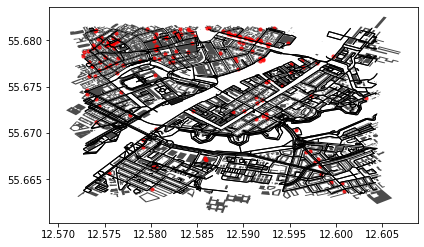

In [13]:
# Plot the footprint 

ax = area.plot(facecolor='white')

# Plot streets
edges.plot(ax=ax, linewidth=1, edgecolor=None)

# Plot buildings
buildings.plot(ax=ax, facecolor='black', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='red', alpha=0.7, markersize=10)
plt.tight_layout()

# let's export a map from the area
outfp = "map.pdf"
plt.savefig(outfp, dpi=300)

## 🏋 Exercise

find restaurants that they have ``payment:bitcoin`` and export a map of them.

# Part 2: how to make interactive maps

### Why interactive maps?
Static maps have been there forever, but it is the era of interactive maps so that the user can interact with them and explore more.

Most interactive maps are made with [Leaflet](https://leafletjs.com) or [OpenLayers](https://openlayers.org) JavaScipt library. JavaScript (JS) is a programming language mostly used for adding interactive content (zoom-able, pan-able maps) on webpages.

[Folium](https://python-visualization.github.io/folium/quickstart.html) library helps you to visualize data on an interactive Leaflet map.


In [23]:
# First, we are going to make a simple interactive web-map with no data on it. 
# We are going to visualize OpenStreetMap for Copenhagen.

import folium

# Create a Map instance
m = folium.Map(location=[55.67, 12.57],
    zoom_start=14, control_scale=True)
m

### Let's check Folium's help 
You can see what tiles you can visualize as basemap in your map such as:
- "OpenStreetMap"
- "Mapbox Bright" (Limited levels of zoom for free tiles)
- "Mapbox Control Room" (Limited levels of zoom for free tiles)
- "Stamen" (Terrain, Toner, and Watercolor)
- "Cloudmade" (Must pass API key)
- "Mapbox" (Must pass API key)
- "CartoDB" (positron and dark_matter)

In [24]:
help(folium.Map)

Help on class Map in module folium.folium:

class Map(branca.element.MacroElement)
 |  Map(location=None, width='100%', height='100%', left='0%', top='0%', position='relative', tiles='OpenStreetMap', attr=None, min_zoom=0, max_zoom=18, zoom_start=10, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180, max_bounds=False, crs='EPSG3857', control_scale=False, prefer_canvas=False, no_touch=False, disable_3d=False, png_enabled=False, zoom_control=True, **kwargs)
 |  
 |  Create a Map with Folium and Leaflet.js
 |  
 |  Generate a base map of given width and height with either default
 |  tilesets or a custom tileset URL. The following tilesets are built-in
 |  to Folium. Pass any of the following to the "tiles" keyword:
 |  
 |      - "OpenStreetMap"
 |      - "Mapbox Bright" (Limited levels of zoom for free tiles)
 |      - "Mapbox Control Room" (Limited levels of zoom for free tiles)
 |      - "Stamen" (Terrain, Toner, and Watercolor)
 |      - "Cloudmade" (Must pass API key)
 |      - "Ma

In [31]:
import folium

# Create a Map instance and this time add more attributes
m = folium.Map(location=[55.67, 12.57], width='80%', height='80%', left='10%', top='0%', tiles="Stamen Toner", zoom_start=8, control_scale=True)
m

In [32]:
# let’s export it to html file on your local driver

outfp = "base_map.html"
m.save(outfp)


Navigate to the file and open it with a text editor and check the script behind. You can also modify some settings there.

**Let's make one more map with AAU in the center**

In [33]:
import folium

# Create a Map instance and this time add more attributes
m = folium.Map(location=[55.66, 12.57], width='100%', height='100%', left='0%', top='0%', tiles='Stamen Toner', zoom_start=15, control_scale=True, prefer_canvas=True)
m

In [34]:
# Let’s add a simple marker to the webmap.

#Create a Map instance
m = folium.Map(location=[55.6505, 12.5429],
    zoom_start=16, control_scale=True)

# Add marker
# Run: help(folium.Icon) for more info about icons
folium.Marker(
    location=[55.6505, 12.5429],
    popup='Aalborg University',
    icon=folium.Icon(color='red', icon='info-sign'),
).add_to(m)

#Show map
m


In [36]:
#you can read more about the markers here 
help(folium.Marker)

Help on class Marker in module folium.map:

class Marker(branca.element.MacroElement)
 |  Marker(location, popup=None, tooltip=None, icon=None, draggable=False, **kwargs)
 |  
 |  Create a simple stock Leaflet marker on the map, with optional
 |  popup text or Vincent visualization.
 |  
 |  Parameters
 |  ----------
 |  location: tuple or list
 |      Latitude and Longitude of Marker (Northing, Easting)
 |  popup: string or folium.Popup, default None
 |      Label for the Marker; either an escaped HTML string to initialize
 |      folium.Popup or a folium.Popup instance.
 |  tooltip: str or folium.Tooltip, default None
 |      Display a text when hovering over the object.
 |  icon: Icon plugin
 |      the Icon plugin to use to render the marker.
 |  draggable: bool, default False
 |      Set to True to be able to drag the marker around the map.
 |  
 |  Returns
 |  -------
 |  Marker names and HTML in obj.template_vars
 |  
 |  Examples
 |  --------
 |  >>> Marker(location=[45.5, -122

and some interesting demos [here](https://python-visualization.github.io/folium/quickstart.html)



Let's go to a mountainous area and enjoy a nice terrain map

In [37]:
# Let's go to a mountainous area and enjoy a nice terrain map
m = folium.Map(location=[45.372, -121.6972], zoom_start=11, tiles='Stamen Terrain')

tooltip = 'Hit me!'

folium.Marker([45.3288, -121.6625], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)
folium.Marker([45.3231, -121.7143], popup='<i>Base camp</i>', tooltip=tooltip).add_to(m)
folium.Marker([45.3341, -121.7233], popup='<b>Jumping spot</b>', tooltip=tooltip).add_to(m)

m

In [38]:

m = folium.Map(
    location=[55.6505, 12.5429],
    tiles='Stamen Toner',
    zoom_start=13
)

# the red one 
folium.Circle(
    radius=100,
    location=[55.6505, 12.5429],
    popup='AAU',
    color='crimson',
    fill=True,
).add_to(m)

# the blue one
folium.CircleMarker(
    location=[55.6505, 12.5429],
    radius=500,
    popup='Area sorrounding AAU',
    color='#3186cc',
    fill=False,
    fill_color='#3186cc'
).add_to(m)

# link to a color brewer for chosing color  http://colorbrewer2.org/# 

# a function to enable lat/lng pop-overs:
m.add_child(folium.LatLngPopup())

#x= m.add_child(folium.ClickForMarker(popup='Waypoint'))

m

In [39]:
# Convert restaurants points to GeoJson
res_gjson = folium.features.GeoJson(restaurants, name = "Restaurants")


In [40]:
# Create a Map instance
m = folium.Map(location=[55.6716, 12.5970], tiles = 'Stamen Toner', zoom_start=14, control_scale=True)

# Add points to the map instance
res_gjson.add_to(m)

# Alternative syntax for adding points to the map instance
#m.add_child(res_gjson)

#Show map
m

## Do you like to dig more into interactive maps?


[Ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) is also another great library for making interactive maps. Better try it out on your own. Some materials [here](https://github.com/jupyter-widgets/ipyleaflet)
